### Импорт

In [28]:
with open('zapiski.txt', 'r', encoding='utf-8') as f:
    data = f.read()

In [29]:
!pip install nltk
!pip install gensim
!pip install pymorphy3 --q
!pip install wikipedia


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [65]:
import csv

import zipfile

import gensim
import logging
import urllib.request

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')  
nltk.download('punkt')
nltk.download('punkt_tab')

sw = stopwords.words('russian')
tokenizer = RegexpTokenizer(r'\w+')

from pymorphy3 import MorphAnalyzer

morph = MorphAnalyzer()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

import wikipedia as wiki

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### 1. Чистка и парсинг

In [31]:
sents = sent_tokenize(data, language='russian')

In [32]:
cleaned_text = []
for sen in sents:
    cleaned_sen = [] 
    cleaned_text.append([morph.parse(w.lower())[0].normal_form \
                         for w in tokenizer.tokenize(sen) 
                         if morph.parse(w.lower())[0].normal_form not in sw])

In [33]:
with open('data.txt', 'w', encoding='utf-8', newline="") as f:
    csv.writer(f, delimiter=" ").writerows(cleaned_text)


### 2. Обучение модели

In [34]:
f = 'data.txt'
data = gensim.models.word2vec.LineSentence(f)

In [35]:
data

In [36]:
model_turg = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2, epochs=50)  #epochs = iter

In [37]:
model_path = "turg.bin"

print("Saving model...")
model_turg.wv.save_word2vec_format(model_path, binary=True)

Saving model...


In [38]:
print(sorted([w for w in model_turg.wv.key_to_index]))

['1', '2', '3', '4', 'c', 'ce', 'cher', 'de', 'est', 'je', 'la', 'lejeune', 'les', 'm', 'mais', 'moi', 'mon', 'monsieur', 'oui', 'pardon', 'r', 'sauvez', 'une', 'y', 'авдюшка', 'авось', 'административный', 'аким', 'аксинья', 'актёр', 'акулин', 'акулина', 'александр', 'александра', 'алексеевич', 'алексей', 'али', 'алый', 'аль', 'ангел', 'английский', 'андреевич', 'анекдотец', 'аннушка', 'анпадистый', 'антип', 'антон', 'арин', 'аркадий', 'аркадия', 'армяк', 'ассигнация', 'астроном', 'ась', 'афанасий', 'ах', 'б', 'баба', 'бабий', 'багровый', 'баловница', 'баня', 'барабан', 'барабанщик', 'баран', 'барашек', 'барин', 'барский', 'бархатный', 'барщина', 'барыня', 'батюшка', 'бауш', 'бауша', 'бег', 'бегать', 'беговой', 'беда', 'бедность', 'бедный', 'бедняга', 'бедняжка', 'бедняк', 'бежать', 'бежина', 'бездна', 'беззаботно', 'беззаботный', 'белево', 'белеть', 'белые', 'белый', 'берег', 'бережно', 'берёза', 'берёзовый', 'бесконечно', 'беспандин', 'беспокоить', 'беспокоиться', 'беспокойный', 'бес

In [39]:
# Смотрим сколько слов в модели
print(len(model_turg.wv.key_to_index))

2972


In [40]:
model_turg.wv.most_similar("важность", topn=10)

[('постоянно', 0.991814136505127),
 ('медлительный', 0.9916861057281494),
 ('читать', 0.9912991523742676),
 ('обширный', 0.9909295439720154),
 ('полянин', 0.99058598279953),
 ('пегий', 0.9904276728630066),
 ('свободный', 0.9902846813201904),
 ('конюшня', 0.9902100563049316),
 ('священник', 0.9901797771453857),
 ('зритель', 0.9901021122932434)]

In [41]:
model_turg.wv.most_similar("ваня", topn=10)

[('усмехнуться', 0.9913842678070068),
 ('коснуться', 0.9904245138168335),
 ('обратиться', 0.9881032109260559),
 ('поплевать', 0.9877343773841858),
 ('передёрнуть', 0.9867672324180603),
 ('вздохнуть', 0.9857433438301086),
 ('понизить', 0.9852438569068909),
 ('удовольствие', 0.9850828647613525),
 ('ласково', 0.985078752040863),
 ('слушать', 0.9846563339233398)]

In [42]:
model_turg.wv.most_similar(positive=["хороший"], negative=["печальный"], topn=1)

[('знать', 0.3918202817440033)]

In [43]:
model_turg.wv.doesnt_match("ермолай хорь федя арина савелий михайло влас степа".split())

'ермолай'

### 3.1 W2V

#### 1

In [44]:
urllib.request.urlretrieve('http://vectors.nlpl.eu/repository/20/186.zip', 'taiga_5_300.zip')


('taiga_5_300.zip', <http.client.HTTPMessage at 0x77aaea9cfa40>)

In [45]:
src = 'taiga_5_300.zip'

with zipfile.ZipFile(src, 'r') as zip_ref:
    zip_ref.extractall('.')

In [46]:
m = 'model.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

#### 2  
растение + хвойный - овощ = лиственный

In [47]:
print(model.most_similar(positive=['растение_NOUN', 'хвойный_ADJ'], negative=['овощ_ADJ'])[0][0])

лиственный_ADJ


#### 3 PCA

In [48]:
def pca_maker(words, n):
    """
    Мне слишком лень переписывать,
    поэтому держите отдельную функцию
    """
    words = words.split(" ")
    X = model[words]
    pca = PCA(n_components=2)
    coords = pca.fit_transform(X)
    plt.scatter(coords[:, 0], coords[:, 1], color='red')
    plt.title(f'Words {n}')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
    plt.show()
    return

In [49]:
words1 = "кошка_NOUN синица_NOUN рысь_NOUN собака_NOUN волк_NOUN панда_NOUN"
words2 = "предел_NOUN функция_NOUN бесконечность_NOUN фундаментальность_NOUN непрерывность_NOUN стремление_NOUN"
words3 = "ключ_NOUN замок_NOUN ножка_NOUN нос_NOUN лук_NOUN земля_NOUN"

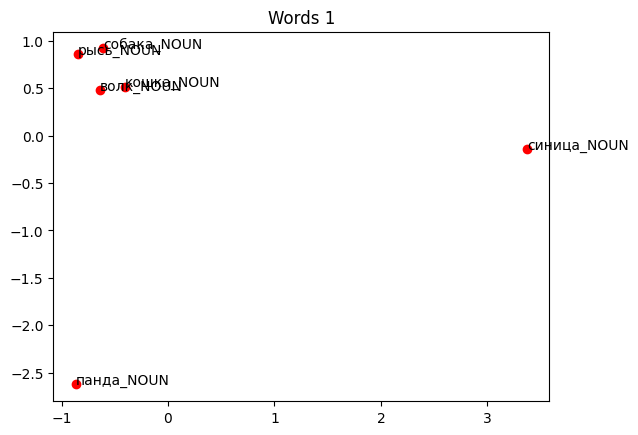

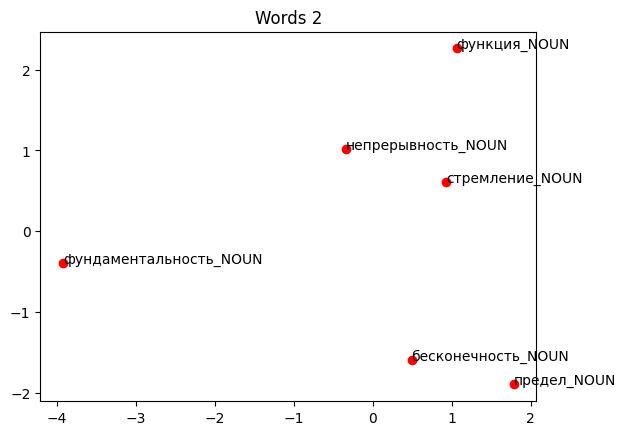

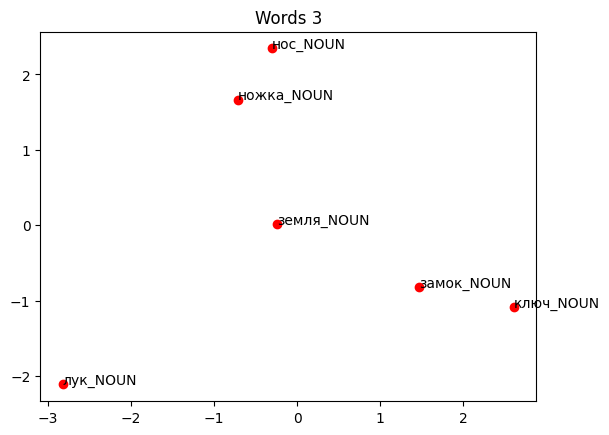

In [50]:
pca_maker(words1, 1)
pca_maker(words2, 2)
pca_maker(words3, 3)

#### 4 Переписывание предложения

Мое прдедложение   
- Возьмите какое-нибудь предложение и замените все слова на ближайшие по векторам, можно просто в лемматизированном виде, потом просто вручную написать предложение, чтобы все согласовывалось.  
"Векторно ближайшее" предложение  


In [51]:
my_sent = ""



In [52]:
my_lem = "взять какой-нибудь предложение и заменить все слово на ближайший вектор можно просто в лемматизированный вид потом просто вручную написать предложение все согласовывалось"

In [53]:
def make_sim_sem(words):
    words_l = words.split(" ")
    for w in words_l

SyntaxError: expected ':' (558095075.py, line 3)

In [ ]:
model.most_similar_cl("давать_VERB")

[('дать_VERB', 0.8743886947631836),
 ('давать_NUM', 0.8399360775947571),
 ('давать_ADP', 0.8251917958259583),
 (',дать_VERB', 0.8220522403717041),
 ('давать_PROPN', 0.8168620467185974),
 ('-дай_VERB', 0.8166336417198181),
 ('давалийский_ADJ', 0.8042982220649719),
 ('дал_VERB', 0.8030280470848083),
 ('давать_NOUN', 0.8026834726333618),
 ('даетинский_PRON', 0.797027587890625)]

In [ ]:
model.vw.most_similar("давать_VERB")

NameError: name 'model' is not defined

### 3.2 TF-IDF

In [69]:
stops = stopwords.words("russian")

tfidf = TfidfVectorizer(
    analyzer="word", # анализировать по словам или по символам (char)
    stop_words=stops # передаём список стоп-слов для русского из NLTK
)

In [54]:
wiki.set_lang('ru')

In [55]:
def get_wikipage(page):
    return wiki.page(page).content

In [62]:
req = ["Марселино Давалос", "Сьерра-Леоне на Паралимпийских играх", "Йора (язык)", "Женская учительская семинария в Бейт-Джале", "Петраковка (Брянская область)", "Зенанполье", "Международная ассоциация футзала", "Ке́вин Тайро́н Юбе́нкс", "Малое Казанское кольцо", "Джейсон Робертсон" , "Всеобщие выборы в Эквадоре" ]
artcs = [get_wikipage(r) for r in req]

In [60]:
for n, page in enumerate(artcs):
    with open(f"wiki/wiki_{n}.txt", "w", encoding='utf-8') as f:
        f.write(page)

In [63]:
artcs

['Марселино Давалос (исп. Marcelino Dávalos; 1871, штат Халиско, Мексика — 1923, Мехико) — мексиканский поэт, прозаик, драматург, журналист. Один из самых известных писателей в истории латиноамериканской литературы XX-го века.\n\n\n== Биография ==\nПолучил высшее образование в области права. Со студенческих лет начал писать стихи. Кроме профессиональной деятельности, активно сотрудничал со средствами массовой информации. В последние годы своей жизни посвятил себя почти полностью журналистике. Публиковался в крупных газетах и журналах Мексики.\nСтал известным поэтом, драматургом и новеллистом, одним из самых видных представителей мексиканской интеллигенции первой четверти XX-го века.\nОднако, после убийства в 1913 году конституционного президента Франсиско Игнасио Мадеро, которого Марселино Давалос всегда публично поддерживал, временный президент Мексики В. Уэрта, прямо ответственный за убийство Мадеро, начал репрессии против бывших сторонников экс-президента. М. Давалос оказался в тюрь

In [66]:
articles_preprocessed = []
for a_text in artcs:
    a_tokens = wordpunct_tokenize(a_text)
    a_lemmatized = " ".join([morph.parse(item)[0].normal_form for item in a_tokens])
    articles_preprocessed.append(a_lemmatized)

In [67]:
articles_preprocessed

['марселиный давалосый ( исп . marcelino dávalos ; 1871 , штат халиско , мексика — 1923 , мехико ) — мексиканский поэт , прозаик , драматург , журналист . один из самый известный писатель в история латиноамериканский литература xx - го век . == биография == получить высокий образование в область право . с студенческий год начать писать стих . кроме профессиональный деятельность , активно сотрудничать с средство массовый информация . в последний год свой жизнь посвятить себя почти полностью журналистика . публиковаться в крупный газета и журнал мексика . стать известный поэт , драматург и новеллист , один из самый видный представитель мексиканский интеллигенция первый четверть xx - го век . однако , после убийство в 1913 год конституционный президент франсиско игнасио мадеро , который марселиный давалосый всегда публично поддерживать , временный президент мексика в . уэрот , прямо ответственный за убийство мадеро , начать репрессия против бывший сторонник экс - президент . м . давалосый

In [70]:
articles_tfidf = tfidf.fit_transform(articles_preprocessed)
print(f"Матрица на {articles_tfidf.shape[0]} документов и {articles_tfidf.shape[1]} термов")

Матрица на 11 документов и 1223 термов
